In [157]:
# Import libraries

import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# machine learning libraries
from pandas.tseries.offsets import DateOffset
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [158]:
# Process Data

# Import data from .csv
btc_metrics_file = 'data/btc_metrics.csv'

btc_df = pd.read_csv(
    btc_metrics_file,
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,stablecoin_supply,rhodl,cvdd,rpv,balanced_price,investor_capitalization
date,,,,,,,,,,,,,,,,
2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,NaN,336.693607,169.528788,0.000537,232.840772,3.017275e+09
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,NaN,322.022994,169.513770,0.000265,232.941445,3.017969e+09
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,NaN,328.552037,169.551559,0.000715,233.108481,3.019992e+09
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,NaN,313.990154,169.582557,0.000692,233.317436,3.022417e+09
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,NaN,324.924804,169.652235,0.000679,233.463981,3.024257e+09


In [159]:
btc_df = btc_df.drop(columns=['stablecoin_supply'])

In [160]:
btc_df['pct_change'] = btc_df['price'].pct_change()
btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change
date,,,,,,,,,,,,,,,,
2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,336.693607,169.528788,0.000537,232.840772,3.017275e+09,NaN
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695


In [161]:
btc_df.shape

(2162, 16)

In [162]:
# Initialize the new Signal column
btc_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
btc_df.loc[(btc_df['pct_change'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
btc_df.loc[(btc_df['pct_change'] < 0), 'Signal'] = -1

btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change,Signal
date,,,,,,,,,,,,,,,,,
2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,336.693607,169.528788,0.000537,232.840772,3.017275e+09,NaN,0.0
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088,1.0
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019,-1.0
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734,1.0
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695,-1.0


In [163]:
btc_df = btc_df.dropna()
btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change,Signal
date,,,,,,,,,,,,,,,,,
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088,1.0
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019,-1.0
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734,1.0
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695,-1.0
2016-01-06,429.925349,1.009046,1.478699,2674.220665,0.158597,0.677147,6840668.0,0.805785,7.098181,0.300722,334.869010,169.693939,0.000581,233.598780,3.025839e+09,-0.007483,-1.0


In [164]:
btc_df.shape

(2160, 17)

In [176]:
y = btc_df['Signal']

In [177]:
X = btc_df.copy().drop(columns=['Signal'])

In [178]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2016-01-02 00:00:00


In [207]:
# Select the ending period for the training data with an offset of 60 months
training_end = X.index.min() + DateOffset(months=60)

# Display the training end date
print(training_end)

2021-01-02 00:00:00


In [208]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change
date,,,,,,,,,,,,,,,,
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695
2016-01-06,429.925349,1.009046,1.478699,2674.220665,0.158597,0.677147,6840668.0,0.805785,7.098181,0.300722,334.869010,169.693939,0.000581,233.598780,3.025839e+09,-0.007483


In [209]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Review the X_test DataFrame
X_train.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change
date,,,,,,,,,,,,,,,,
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695
2016-01-06,429.925349,1.009046,1.478699,2674.220665,0.158597,0.677147,6840668.0,0.805785,7.098181,0.300722,334.869010,169.693939,0.000581,233.598780,3.025839e+09,-0.007483


In [210]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [211]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

In [212]:
# Use the testing data to make the model predictions
svm_train_pred = svm_model.predict(X_train_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_training_report = classification_report(y_train, svm_train_pred)

# Print the classification report
print(svm_training_report)

              precision    recall  f1-score   support

        -1.0       0.98      0.96      0.97       817
         1.0       0.97      0.98      0.98      1011

    accuracy                           0.97      1828
   macro avg       0.97      0.97      0.97      1828
weighted avg       0.97      0.97      0.97      1828



In [213]:
# Use the testing data to make the model predictions
svm_test_pred = svm_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_test_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.88      0.63       161
         1.0       0.59      0.16      0.25       172

    accuracy                           0.51       333
   macro avg       0.54      0.52      0.44       333
weighted avg       0.54      0.51      0.43       333



In [214]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_test_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = btc_df["pct_change"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-02,1.0,0.091207,0.091207
2021-01-03,1.0,0.028329,0.028329
2021-01-04,1.0,-0.030609,-0.030609
2021-01-05,1.0,0.067000,0.067000
2021-01-06,1.0,0.081595,0.081595


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-11-26,-1.0,-0.087670,0.087670
2021-11-27,-1.0,0.014515,-0.014515
2021-11-28,-1.0,0.048763,-0.048763
2021-11-29,-1.0,0.010740,-0.010740
2021-11-30,-1.0,-0.015576,0.015576


<AxesSubplot:xlabel='date'>

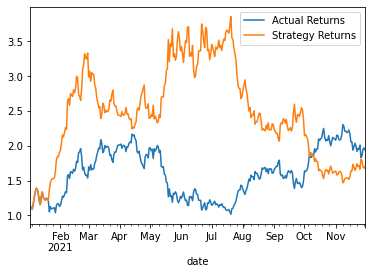

In [215]:
(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()